In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_blobs

In [15]:
X, y = make_blobs(n_samples=1000, centers=4, n_features=2,
                  random_state=42,cluster_std=1.5)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
X_train=torch.from_numpy(X_train).type(torch.float)
y_train=torch.from_numpy(y_train).type(torch.float)
X_test=torch.from_numpy(X_test).type(torch.float)
y_test=torch.from_numpy(y_test).type(torch.float)

In [4]:
X.shape

(1000, 2)

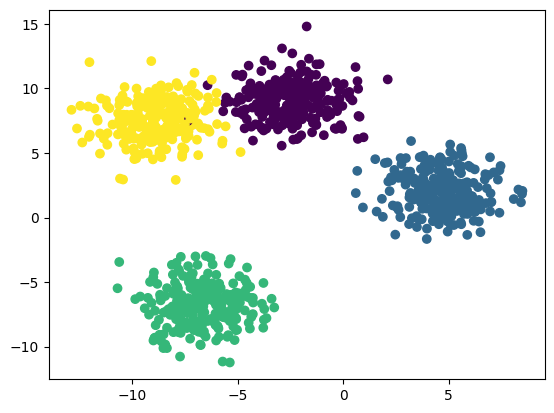

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [22]:
from torch import nn
class ClassificationV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.neuralnet=nn.Sequential(
        nn.Linear(in_features=2, out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10, out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10, out_features=4)
    )
  def forward(self,x):
    return self.neuralnet(x)

In [23]:
torch.cuda.manual_seed(42)
model=ClassificationV2()

In [24]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


In [25]:
epoch=1000
loss_fn=loss = nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.1)
for i in range(epoch):
  model.train()
  y_pred=model(X_train)
  # print(X_train.size(),y_pred.size(),y_train.size())
  loss=loss_fn(y_pred.squeeze(),y_train.long())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

In [26]:
model.eval()
with torch.inference_mode():
    y_preds_log = model(X_test)  # X_test: shape [batch_size, 2]
y_preds = torch.softmax(y_preds_log, dim=1)
predd=torch.argmax(y_preds,dim=1)
y_test[:10],predd[:10]

(tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0.]),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]))

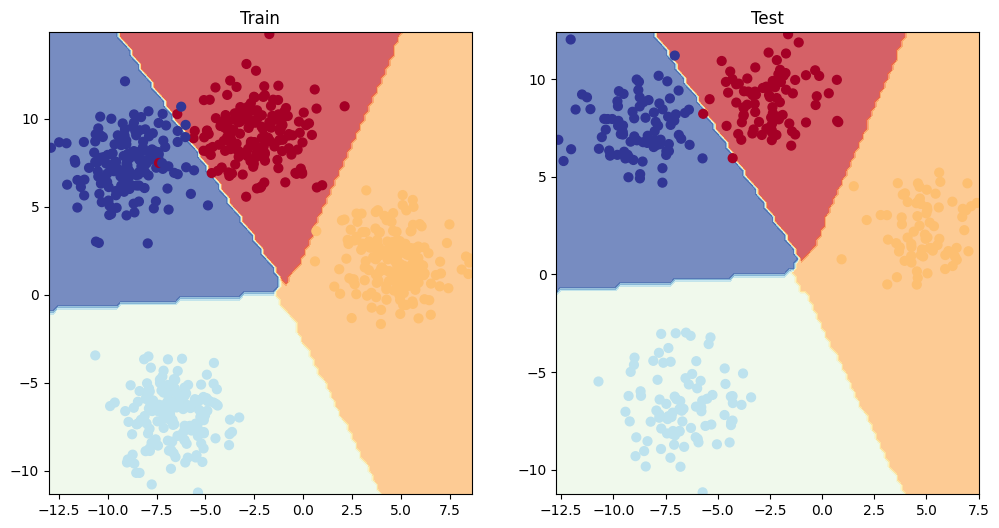

In [27]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

In [28]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 11.7 MB/s eta 0:00:00


In [32]:
from torchmetrics import Accuracy
accuracy = Accuracy(task="multiclass", num_classes=4)
accuracy(predd,y_test)

tensor(0.9909)